<a href="https://colab.research.google.com/github/AnishBehera05/Data_Analysis_911_call_data_Report/blob/main/911_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/911.csv')

In [70]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [71]:
# Displaying the first few rows of the DataFrame
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [72]:
# Finding the top 5 zip codes for 911 calls
top_zipcodes = df['zip'].value_counts().head()
print(top_zipcodes)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64


In [73]:
# Finding the top 5 townships for 911 calls
top_townships = df['twp'].value_counts().head()
print(top_townships)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64


In [74]:
# Finding the number of unique title codes
unique_titles = df['title'].nunique()
print(unique_titles)

148


In [75]:
# Creating a new column 'Reason' based on the 'title' column
def extract_reason(title):
    if isinstance(title, str):  # Check if title is a string
        return title.split(':')[0]
    else:
        return 'Unknown'

df['Reason'] = df['title'].apply(extract_reason)

In [76]:
# Finding the most common Reason for a 911 call
common_reasons = df['Reason'].value_counts()
print(common_reasons)

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64


<Axes: xlabel='Reason', ylabel='count'>

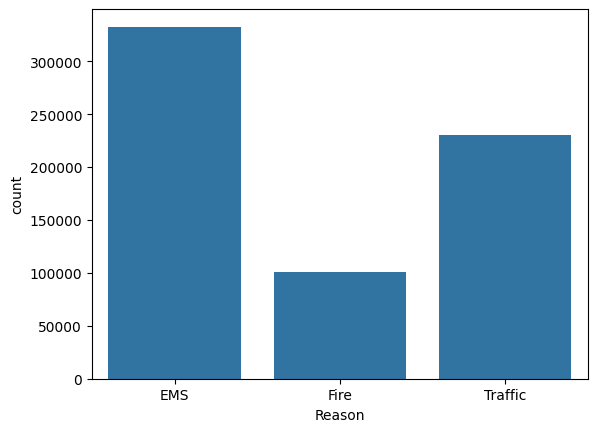

In [77]:
# Creating a countplot of 911 calls by Reason
sns.countplot(x='Reason', data=df)

In [78]:
# Converting the 'timeStamp' column to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [79]:
# Extracting Hour, Month, and Day of Week from the 'timeStamp' column
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [80]:
# Mapping the Day of Week integer to actual day names
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

<Axes: xlabel='Day of Week', ylabel='count'>

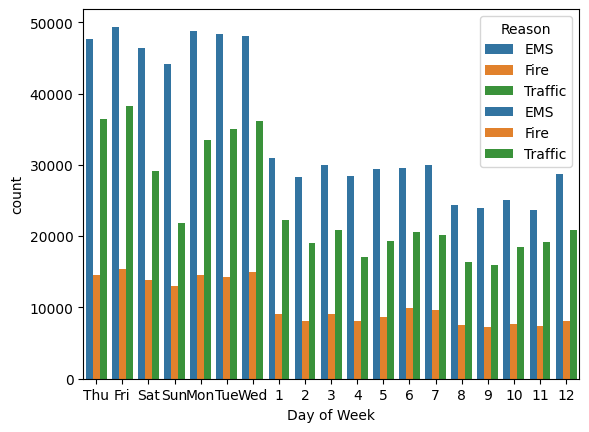

In [81]:
# Creating countplots of 911 calls by Day of Week and Month
sns.countplot(x='Day of Week', data=df, hue='Reason')
sns.countplot(x='Month', data=df, hue='Reason')

<Axes: xlabel='Month'>

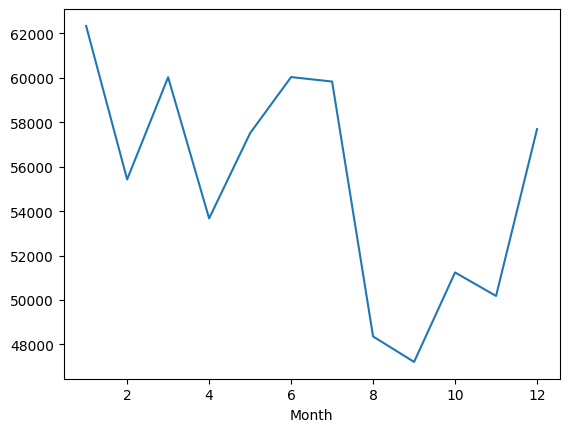

In [82]:
# Creating a line plot of the count of calls per month
byMonth = df.groupby('Month').count()
byMonth['lat'].plot()

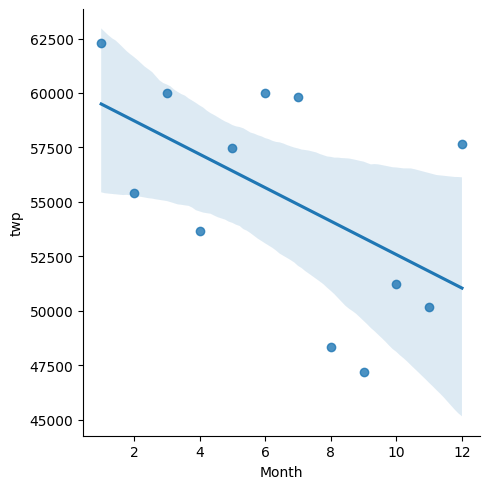

In [83]:
# Creating a linear fit plot of calls per month
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [84]:
# Creating a new column 'Date' containing the date from the 'timeStamp' column
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

<Axes: xlabel='Date'>

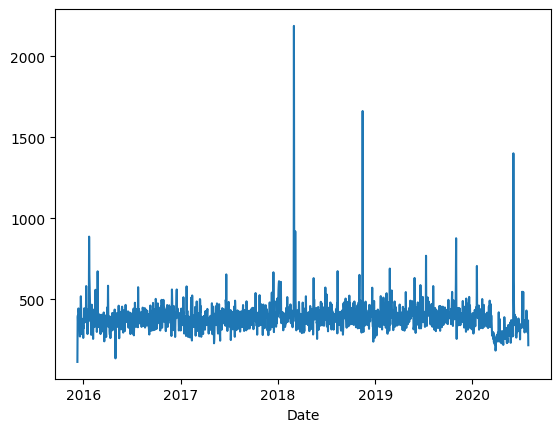

In [85]:
# Creating a plot of counts of 911 calls by date
df.groupby('Date').count()['lat'].plot()

<Axes: title={'center': 'EMS'}, xlabel='Date'>

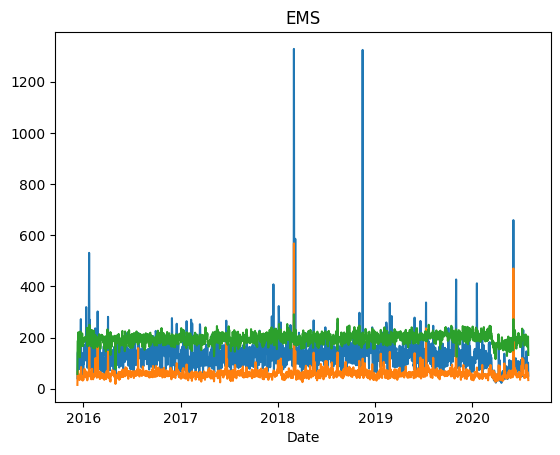

In [86]:
# Creating separate plots for each Reason for 911 calls
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(title='Traffic')
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot(title='Fire')
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot(title='EMS')

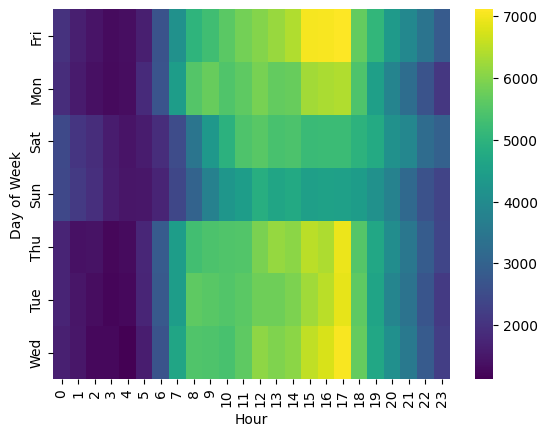

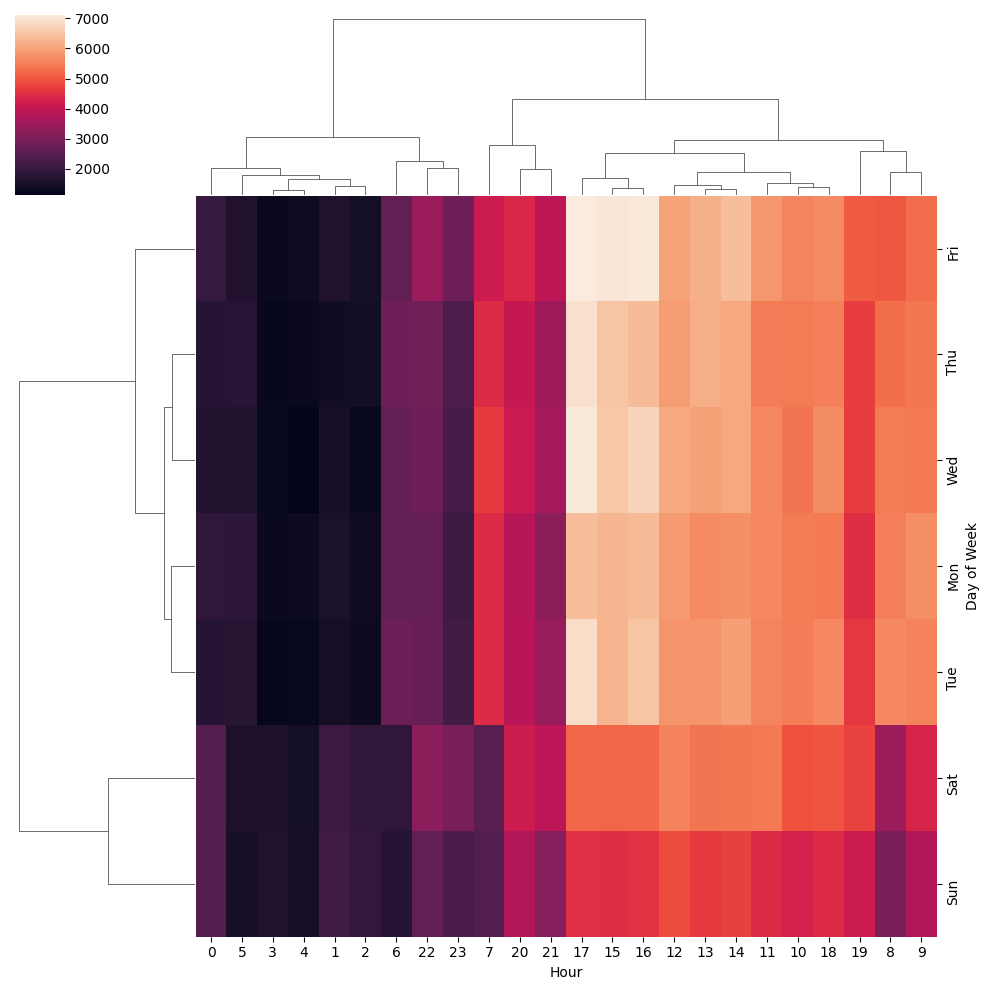

In [87]:
# Creating heatmaps and clustermaps
day_hour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
sns.heatmap(day_hour, cmap='viridis')
sns.clustermap(day_hour)

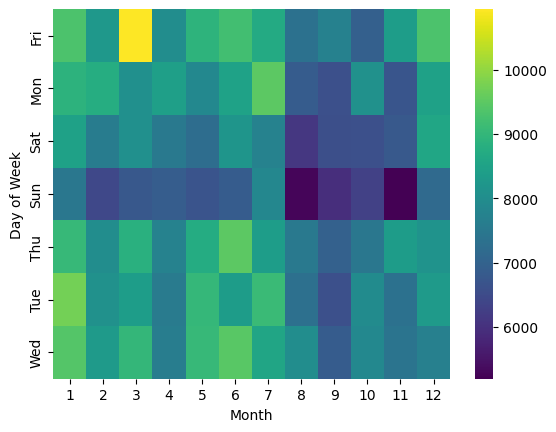

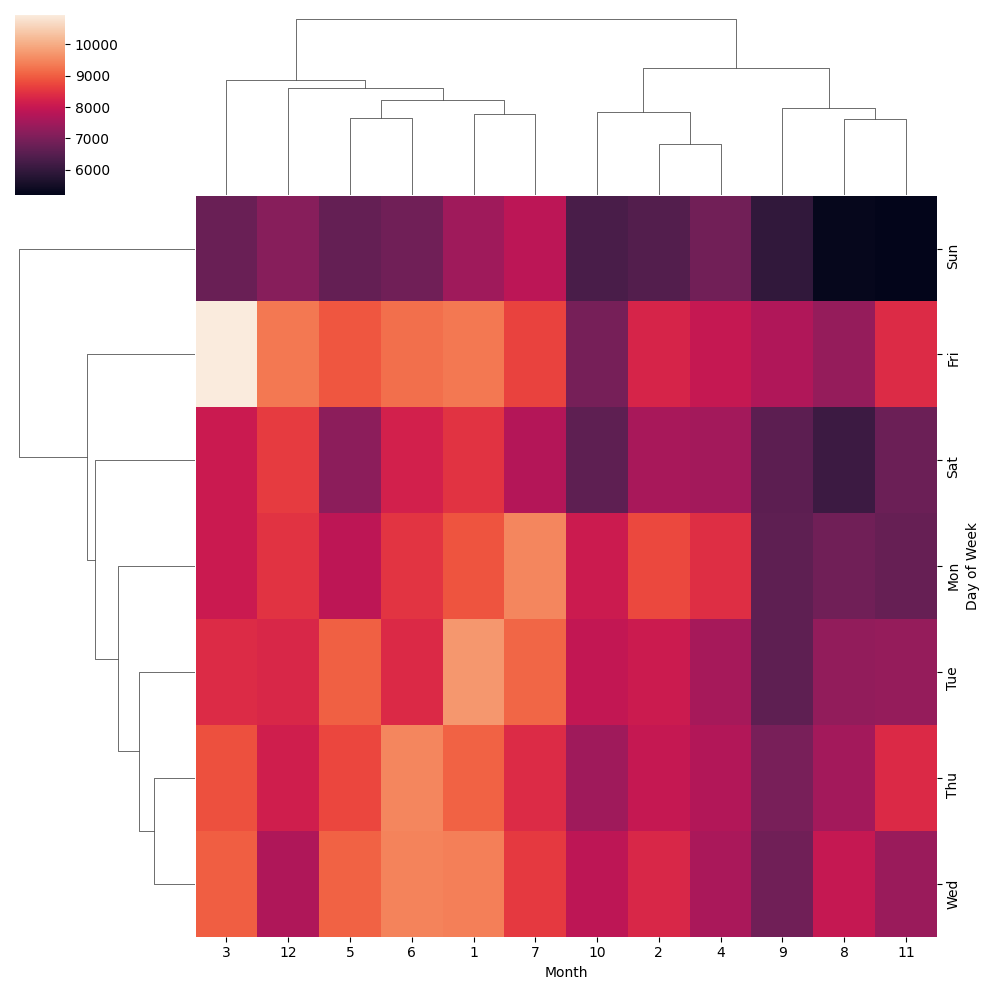

In [88]:
day_month = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
sns.heatmap(day_month, cmap='viridis')
sns.clustermap(day_month)
plt.show()